# chapter04 data expression and characteristic engineering

- 지금까지 우리는 데이터가 2차원 실수형 배열로 각 열이 포인트를 설명하는 **연속형 특성**이라고 가정했지만 많은 애플리케이션에서 이렇게 데이터가 수집되지 않습니다.

- 일반적인 특성의 전형적인 형태는 **범주형 특성** 또는 **이산형 특성**이라고도 하는 이런 특성은 보통 숫자 값이 아닙니다.

    - 범주형 특성과 연속적인 특성 사이의 차이는 분류와 회귀의 차이와 비슷하지만, 출력이 아닌 입력에 대한 것이란 점이 다릅니다.

    - 범주형 특성의 예로는 제품의 브랜드, 색상, 판매분류 등이 있습니다.

- 이런 특성들은 모두 상품을 묘사하는 속성이지만 연속된 값으로 나타나지 않습니다.

    - 한 제품은 옷에 속하거나 책에 속하는데 책과 옷 사이에는 중간값이 없고 이 카테고리들 사이에는 순서가 없습니다.

- 하지만 데이터가 어떤 형태의 특성으로 구성되어 있는가보다 데이터를 어떻게 표현하는가가 머신러닝 모델의 성능에 주는 영향이 더 큽니다.

    - 2장과 3장에서 데이터의 스케일이 중요하다는 것을 보았으며 다른 말로 하면 데이터의 스케일을 조정하지 않으면 측정치에 따라 차이가 생깁니다.

    - 또 2장에서 본 대로 특성의 상호작용이나 일반적인 다항식을 추가 특성으로 넣는 것이 도움될 수 있습니다.

- 특정 애플리케이션에 가장 적합한 데이터 표현을 찾는 것을 **특성 공학**이라고 하며 실제 문제를 풀기 위해 당면하는 주요 작업 중 하나입니다.

- 올바른 데이터 표현은 지도 학습 모델에서 적절한 매개변수를 선택하는 것보다 성능에 더 큰 영향을 미칩니다.

- 이번 장에는 먼저 범주형 특성의 보편적이고 중요한 사례를 살펴보고, 특정 모델에 잘 맞도록 특성을 변환하는 예를 보겠습니다.

## 4.1 범주형 변수

- 예제에 사용할 데이터는 1994년 인구 조사 데이터베이스에서 추출한 미국 성인의 소득 데이터셋입니다.

- 해당 데이터셋을 사용해 어떤 근로자의 수입이 50000달러를 초과하는지 아닌지 예측하려고 합니다.

    - 데이터셋에는 나이, 고용형태, 교육 수준, 성별, 주당 근로시간, 직업 등의 특성이 있습니다.

    - 이 작업은 소득을 두 클래스로 나누는 분류 문제로 볼 수 있거나 정확한 소득을 예측하는 회귀 문제가 될 수 있습니다만 여기에서는 분류 문제로 보겠습니다.

- 이 데이터셋에 있는 age와 hours-pre-week는 연속형 특성이지만 workclass, education, sex, occupation은 범주형 특성입니다.

    - 이런 특성들은 어떤 범위가 아닌 고정된 목록 중 하나를 값으로 가지는 정량적이 아닌 정성적인 속성입니다.

- 맨 먼저 이 데이터에 로지스틱 회귀 분류기를 학습시켜보겠습니다. 2장에서 배운 것처럼 로지스틱 회귀는 입력값 x에 가중치 w를 곱한 뒤 합친 값에 편향 b를 더해 출력값 y를 예측합니다.

    - 여기서 w와 b는 훈련 세트로부터 학습되는 계수이고 x는 입력 특성입니다.

    - 이 공식에 따르면 x는 숫자여야 하므로 'Masters', 'Bachelors'가 될 수 없습니다.

- 그러므로 로지스틱 회귀를 사용하기 위해 데이터를 다른 방식으로 표현해야 합니다. 이 문제는 다음 절에서 해결하며 설명하겠습니다.

### 4.1.1 원-핫-인코딩(가변수)

- 범주형 변수를 표현하는 데 가장 널리 쓰이는 방법은 **원-핫-인코딩**이라하며 **원-아웃-오브-엔-인코딩** 혹은 **가변수**라고도 합니다.

- 가변수는 범주형 변수를 0 또는 1 값을 가진 하나 이상의 새로운 특성으로 바꾼 것입니다.

    - 0과 1로 표현된 변수는 선형 이진 분류 공식과 scikit-learn의 다른 모든 모델에 적용할 수 있어서 계수에 상관없이 범주마다 하나의 특성으로 표현합니다.

- 예를 들어 workclass 특성에 'Goverment Employee', 'Private Employee', 'Self Employed', 'Self Employed Incorporated'란 값이 있다고 가정하겠습니다.

    - 이 네 가지 값을 인코딩하기 위해 네 개의 새로운 특성(각 특성은 원래 특성에 대응합니다.)을 만듭니다.

    - 그렇다면 어떤 사람의 workclass 값에 해당하는 특성이 1이 되고 나머지 세 특성은 0이 됩니다.

- 즉, 데이터 포인트마다 정확히 N개의 새로운 특성 중 하나는 1이 되는데 그래서 원-핫 또는 원-아웃-오브-엔-인코딩이라고 합니다.

    - 이렇게 인코딩된 특성은 머신러닝 알고리즘에 적용할 때 원래 특성을 대체하여 0과 1로 된 특성을 사용하게 됩니다.

#### Note

> 우리가 사용하는 원-핫 인코딩은 통계학에서 사용하는 더미 코딩과 비슷하지만 완전히 같지는 않습니다.
>
> 간편하게 하려고 각 범주를 각기 다른 이진 특성으로 바꾸었는데 통계학에서는 k개의 값을 가진 범주형 특성은 k-1개의 특성으로 변환하는 것이 일반적입니다.
>
> 이렇게 분석하는 이유는 분석의 편리성 때문으로 기술적으로는 데이터 행렬의 랭크 부족 현상을 피하기 위해서 입니다.

- pandas나 scikit-learn을 이용해서 범주형 변수를 원-핫 인코딩으로 바꿀 수 있습니다.

- 우선 pandas로 처리하는 방법을 알아보기 위해 CSV 파일에서 데이터를 읽겠습니다.

In [1]:
import pandas as pd
import mglearn
import os

data = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, 'adult.data'), header=None, index_col=False,
    names=[
        'age', 'workclass', 'fnlwgt', 'education', 'education-num',
        'marital-status', 'occupation', 'relationship', 'race', 'gender',
        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
    ]
)

# 예제를 위해 몇 개의 열만 선택하겠습니다.
data = data[['age', 'workclass', 'education', 'occupation', 'gender', 'hours-per-week', 'income']]
data.head()

,age,workclass,education,occupation,gender,hours-per-week,income
0,39,State-gov,Bachelors,Adm-clerical,Male,40,<=50K
1,50,Self-emp-not-inc,Bachelors,Exec-managerial,Male,13,<=50K
2,38,Private,HS-grad,Handlers-cleaners,Male,40,<=50K
3,53,Private,11th,Handlers-cleaners,Male,40,<=50K
4,28,Private,Bachelors,Prof-specialty,Female,40,<=50K


#### 범주형 데이터 문자열 확인하기

- 이처럼 데이터셋을 읽고 나면, 먼저 열에 어떤 의미 있는 범주형 데이터가 있는지 확인해보는 것이 중요합니다.

- 사용자로부터 입력받은 데이터를 다룰 때는 정해진 범주 밖의 값이 있을 수 있고 철자나 대소문자가 틀려서 데이터를 전처리해야 할 수 있습니다.

    - 예를 들어 사람에 따라 남성을 'male'이나 'man'으로 쓸 수 있기에 두 입력값을 모두 같은 범주로 인식해야 합니다.

- 열의 내용을 확인하는 좋은 방법은 pandas에서 DataFrame의 열을 나타내는 Series의 value_counts 메서드를 사용하여 유일한 값이 각각 몇 번 나타나는지 출력하는 것입니다.

In [2]:
print(data.gender.value_counts())

Male      21790
 Female    10771
Name: gender, dtype: int64


- 이 데이터셋의 gender는 정확히 male과 female이라는 두 가지 값을 가지고 있어 원-핫-인코딩으로 나타내기 좋은 형태입니다.

    - 실제 애플리케이션에서는 모든 열을 살펴보고 그 값들을 확인해야 하지만 여기서는 그냥 넘어가겠습니다.

- pandas에서는 get_dummies 함수를 사용해 데이터를 매우 쉽게 인코딩할 수 있습니다.

    - get_dummies는 객체 타입이나 범주형을 가진 열을 자동으로 변환해줍니다.

In [3]:
print('원본 특성:\n', list(data.columns), '\n')

data_dummies = pd.get_dummies(data)
print('get_dummies 후의 특성:\n', list(data_dummies.columns))

원본 특성:
 ['age', 'workclass', 'education', 'occupation', 'gender', 'hours-per-week', 'income'] 

get_dummies 후의 특성:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-

- 연속형 특성인 age와 hours-per-week는 그대로지만 범주형 특성은 값마다 새로운 특성으로 확장되었습니다.

In [4]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,gender_ Female,gender_ Male,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0


- data_dummies의 values 속성을 이용해 DataFrame을 NumPy 배열로 바꿀 수 있으며 이를 이용해 머신러닝 모델을 학습시킵니다.

- 모델을 학습시키 전에 이 데이터로 부터 income에 관한 두 열의 타깃값을 분리해야 합니다.

    - 출력값이나 출력값으로부터 유도된 변수를 특성 표현에 포함하는 것은 지도 학습 모델을 만들 때 특히 저지르기 쉬운 실수입니다.

#### CAUTION

> pandas에서 열 인덱싱은 범위 끝을 포함합니다.
>
> 그래서 'age':'occupation\_ Transport-moving'이라 하면 'occupation\_ Transport-moving'을 포함합니다.
>
> 하지만 NumPy 배열의 슬라이싱은 마지막 범위를 포함하지 않습니다.

- 여기서는 특성을 포함한 열, 즉 age부터 occupation_ Transport-moving까지 모든 열을 추출합니다. 이 범위에는 타깃을 뺀 모든 특성이 포함됩니다.

In [5]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']

# NumPy 배열을 추출합니다.
X, y = features.values, data_dummies['income_ >50K'].values
print('X.shape:', X.shape, 'y.shape:', y.shape)

X.shape: (32561, 42) y.shape: (32561,)


- 이제 데이터가 scikit-learn에서 사용할 수 있는 형태가 되었으므로, 이전과 같은 방식을 사용할 수 있습니다.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(f'테스트 점수: {logreg.score(X_test, y_test):.2f}')

테스트 점수: 0.80


#### CAUTION

> 이 예에서 훈련 데이터와 테스트 데이터를 모두 담고 있는 DataFrame을 사용해 get_dummies를 호출했습니다.
>
> 이는 훈련 세트와 테스트 세트의 범주형 값이 같은 방식으로 표현되어야 하기 때문입니다.
>
> 예를 들어 훈련 세트와 테스트 세트를 두 개의 서로 다른 DataFrame으로 가지고 있다고 가정해보겠습니다.
>
> workclass 특성의 'Private Employee' 값이 테스트 세트에 나타나지 않으면 pandas는 이 특성의 값이 세 개뿐이라 판단하고 세 개의 가변수 특성을 만듭니다.
>
> 그러면 훈련 세트와 테스트 세트의 특성 개수가 달라지고 훈련 세트에서 학습된 모델을 테스트 세트에 적용할 수 없게 됩니다.
>
> 더 심각하게 훈련 세트와 테스트 세트가 아예 상반된 값만 가지고 있다고 생각해보면 pandas는 양쪽 모두 두 개의 새로운 가변수 특성을 추가하게 되어 만들어진 두 DataFrame의 특성 개수는 같아질 것입니다.
>
> 그러나 가변수 특성 두 개는 훈련 세트와 테스트 세트에서 완전히 다른 의미를 가지게 됩니다.
>
> 따라서 사실 매우 다른 의미의 두 열을 같을 것이라고 생각하기 때문에, 이런 데이터로 머신러닝 모델을 만들면 매우 나쁜 결과를 얻게 됩니다.
>
> 이런 문제를 겪지 않으려면 훈련 데이터와 테스트 데이터 포인트를 모두 포함하는 DataFrame을 사용해 get_dummies를 호출하든지 각각 get_dummies를 호출한 후에 훈련 세트와 테스트 세트의 열 이름을 비교해서 같은 속성인지 파악해야 합니다.

### 4.1.2 숫자로 표현된 범주형 특성

- adult 데이터셋에는 범주형 변수가 문자열로 인코딩되어 있습니다.

    - 이들은 철자 오류가 날 수 있지만 한편으로 변수가 범주형이라는 것을 확실하게 알려줍니다.

- 하지만 저장 공간을 절약하거나 데이터 취합 방식에 따라 범주형 변수가 숫자고 인코딩된 경우가 많습니다.

    - 예를 들어 adult 데이터셋에 있는 인구조사 데이터가 설문지를 이용해 모은 것이라 가정할 때 workclass에 대한 대답이 0, 1, 2로 각 체크박스에 대응하게 됩니다.

    - 그렇다면 이 열은 'Private'와 같은 문자열이 아니라 0에서 8까지의 숫자로 채워지게 되는데 이런 경우 이 데이터셋의 이 변수를 연속형으로 다뤄야 할지 범주형으로 다뤄야 할지 알아채기 어렵습니다.

    - 그러나 숫자가 workclass를 나타낸다고 알게 되면, 이 값은 이산적이므로 연속형 변수로 다루면 안된다는 것이 명확해집니다.

#### CAUTION

> 범주형 특성은 종종 숫자고 인코딩됩니다.
>
> 특성의 값이 숫자라고 해서 연속형 특성으로 다뤄야 한다는 의미는 아닙니다.
>
> 숫자로 된 특성이 연속적인지 또는 이산적인지는 항상 명확하지 않습니다.
>
> 인코딩 된 값 사이에 어떤 순서도 없으면 이 특성은 이산적이라고 생각해야 합니다.
>
> 예를 들어 별 다섯개 만점으로 매긴 평점 데이터의 경우 적절한 인코딩 방법은 풀려는 문제나 데이터 그리고 사용하는 머신러닝 알고리즘에 달렸습니다.

- pandas의 get_dummies 함수는 숫자 특성은 모두 연속형이라고 생각해서 가변수를 만들지 않습니다.

    - 이를 확인하기 위해 각각 문자열과 숫자로 표현된 두 개의 범주형 특성을 가진 DataFrame 객체를 만들어보겠습니다.

In [7]:
# 숫자 특성과 범주형 문자열 특성을 가진 DataFrame을 만듭니다.
demo_df = pd.DataFrame({'numberic attribute': [0, 1, 2, 1], 'categorical attribute': ['socks', 'fox', 'socks', 'box']})
demo_df

,numberic attribute,categorical attribute
0,0,socks
1,1,fox
2,2,socks
3,1,box


- 위 데이터에 get_dummies를 사용하면 문자열 특성만 인코딩되며 숫자 특성은 바뀌지 않습니다.

In [8]:
pd.get_dummies(demo_df)

,numberic attribute,categorical attribute_box,categorical attribute_fox,categorical attribute_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


- 만약 숫자 특성도 가변수로 만들고 싶다면 columns 매개변수에 인코딩하고 싶은 열을 명시해야 합니다.

In [9]:
demo_df['numberic attribute'] = demo_df['numberic attribute'].astype(str)
pd.get_dummies(demo_df, columns=['numberic attribute', 'categorical attribute'])

,numberic attribute_0,numberic attribute_1,numberic attribute_2,categorical attribute_box,categorical attribute_fox,categorical attribute_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


## 4.2 OneHotEncoder와 ColumnTransformer: scikit-learn으로 범주형 변수 다루기

- 이전에 언급한 것처럼 scikit-learn은 원-핫-인코딩을 수행할 수 있습니다.

- scikit-learn은 훈련 세트와 테스트 세트를 같은 방식으로 다루기 쉬운 것이 장점으로 원-핫-인코딩은 OneHotEncoder 클래스에 구현되어 있습니다.

    - OneHotEncoder는 모든 열에 인코딩을 수행합니다.

In [10]:
from sklearn.preprocessing import OneHotEncoder

# spare=False로 설정하면 OneHotEncoder가 희소 행렬이 아닌 Numpy 배열을 반환합니다.
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0.]]


- 문자열 특성과 정수 특성이 모두 변환되었습니다.

- scikit-learn의 출력은 DataFrame이 아니기 때문에 열 이름이 없습니다. 따라서 변환된 특성의 원본 범주형 변수 이름은 get_features_names 메서드를 사용합니다.

In [11]:
print(ohe.get_feature_names())

['x0_0' 'x0_1' 'x0_2' 'x1_box' 'x1_fox' 'x1_socks']


- 위 결과에 따르면 처음 세 개의 열은 첫 번째 원본 특성(x0)의 값 0, 1, 2에 해당하고 마지막 세 개의 열은 두 번째 원본 특성(x1)의 값 '상자', '여우', '양말'에 해당합니다.

- 대부분의 애플리케이션에서 일부 특성은 범주형이고 일부는 연속형입니다. OneHotEncoder는 모든 특성을 범주형이라고 가정하기 때문에 바로 적용할 수는 없습니다.

- 따라서 이를 해결하기 위해 ColumnTransformer 클래스가 필요합니다.

    - 이 클래스는 입력 데이터에 있는 열마다 다른 변환을 적용할 수 있습니다.

    - 연속형 특성과 범주형 특성은 매우 다른 종류의 전처리 과정이 필요하기 때문에 이 클래스가 매우 유용합니다.

In [12]:
# 앞서 보았던 adult 데이터셋입니다.
data.head()

,age,workclass,education,occupation,gender,hours-per-week,income
0,39,State-gov,Bachelors,Adm-clerical,Male,40,<=50K
1,50,Self-emp-not-inc,Bachelors,Exec-managerial,Male,13,<=50K
2,38,Private,HS-grad,Handlers-cleaners,Male,40,<=50K
3,53,Private,11th,Handlers-cleaners,Male,40,<=50K
4,28,Private,Bachelors,Prof-specialty,Female,40,<=50K


- 이 데이터셋에 선형 모델을 적용하여 소득을 예측하려면 범주형 변수에 원-핫-인코딩을 적용하는 것 외에 연속형 변수인 age와 hours-per-week의 스케일도 조정해야 합니다.

- 여기에서 ColumnTransformer가 필요합니다.

    - 각 열의 변환은 이름, 변환기 객체, 이 변환이 적용될 열을 지정합니다. 열은 열 이름이나 정수 인덱스, Boolean Mask로 선택할 수 있습니다.

- 해당 열에 변환이 적용된 후 그 결과가 합쳐집니다. 앞선 예에서 열 이름을 사용하면 다음과 같습니다.

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([
    ('scaling', StandardScaler(), ['age', 'hours-per-week']),
    ('onehot', OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'])
])

- 다른 scikit-learn 변환기와 동일하게 ColumnTransformer 객체는 fit, transform 메서드를 사용할 수 있습니다.

- 이제 이전처럼 선형 모델을 만들되 이번에는 연속형 변수의 스케일을 조정하겠습니다.

    - train_test_split 함수에 Numpy 배열이 아닌 특성을 포함하고 있는 DataFrame을 전달할 수 있습니다.

    - ColumnTransformer에 필요하므로 열 이름은 보존해야 합니다.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# income을 제외한 모든 열을 추출합니다.
data_features = data.drop('income', axis=1)

# DataFrame과 imcome을 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(data_features, data.income, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


- pd.get_dummies를 사용한 것과 마찬가지로 44개의 특성이 만들어졌으며 여기서는 연속형 특성을 스케일 조정했다는 차이만 있습니다.

- 이제 이를 기반으로 LogisticRegression 모델을 만들 수 있습니다.

In [15]:
logreg = LogisticRegression()
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print(f'테스트 점수: {logreg.score(X_test_trans, y_test):.2f}')

테스트 점수: 0.81


- 이 경우에 데이터의 스케일이 영향을 미치지 못했습니다.

- 하나의 변환기로 모든 전처리 단계를 캡슐화하면 장점이 더 있습니다. 이에 대한 설명은 나중에 이어가겠습니다.

- ColumnTransformer 안의 단계에 접근하면 named_transformers_ 속성을 사용합니다.

In [16]:
ct.named_transformers_

{'scaling': StandardScaler(copy=True, with_mean=True, with_std=True),
 'onehot': OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
               handle_unknown='error', sparse=False)}

## 4.3 make_column_transformer로 간편하게 ColumnTransformer 만들기

- 앞서 설명한대로 ColumnTransformer를 만들면 조금 번거로울 때가 있습니다. 하지만 각 단계 이름을 일일이 지정할 필요가 없는 경우가 많습니다.

- 이럴 때 클래스 이름을 기반으로 자동으로 각 단계에 이름을 붙여주는 편리한 함수(make_column_transformer)가 있습니다. 이 함수의 사용법은 다음과 같습니다.

In [17]:
from sklearn.compose import make_column_transformer

ct = make_column_transformer(
    (['age', 'hours-per-week'], StandardScaler()),
    (['workclass', 'education', 'gender', 'occupation'], OneHotEncoder(sparse=False))
)

- ColumnTransformer의 한 가지 단점은 아직 변환된 출력 열에 대응하는 입력 열을 찾지 못한다는 점입니다.(scikit-learn 0.20 기준입니다.)

## 4.4 구간 분할, 이산화 그리고 선형 모델, 트리 모델

- 데이터를 가장 잘 표현하는 방법은 데이터가 가진 의미뿐 아니라 어떤 모델을 사용하는지에 따라 다릅니다.

- 아주 폭넓게 사용하는 두 알고리즘인 선형 모델과 트리 기반 모델(결정 트리, 그레이디언트 부스팅 트리, 랜덤 포레스트 등)은 특성의 표현 방식으로 인해 미치는 영향이 매우 다릅니다.

    - 2장에서 사용한 wave 데이터셋은 입력 특성이 하나 뿐인데 이 데이터셋을 이용해 선형 회귀 모델과 결정 트리 회귀를 비교해보겠습니다.

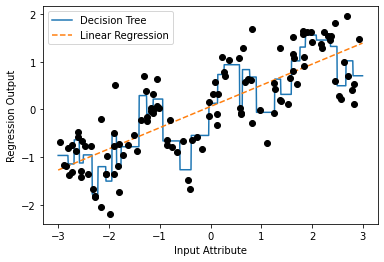

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt
import numpy as np

X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
plt.plot(line, reg.predict(line), label='Decision Tree')

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label='Linear Regression')

plt.plot(X[:, 0], y, 'o', c='k')
plt.xlabel('Input Attribute')
plt.ylabel('Regression Output')
plt.legend(loc='best')

- 이 특성의 입력값 범위(여기에서는 -3에서 3까지)가 나뉘어 여러 구간으로(예를 들어 10개) 되어 있다고 가정하겠습니다.

- 그렇다면 각 데이터가 어떤 구간에 속하는지로 나타낼 수 있으며 그 구간의 경계를 정의하는 데는 여러 방법이 있습니다.

    - 예를 들어 균일한 너비로(구간의 경계 간의 거리가 동일하게) 하거나 데이터의 분위(데이터가 많은 구간은 좁아지는 형태)를 사용할 수 있습니다.

- 이러한 방식은 KBinsDiscretizer 클래스에 구현되어 있습니다.

In [22]:
from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
print('bin edges:\n', kb.bin_edges_)

bin edges:
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
       -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
        2.92132162])]


- 첫 번째 구간은 특성 값이 -2.967(데이터에서 가장 작은 값)에서 -2.378까지 모든 데이터 포인트를 담고 두 번째 구간은 -2.378에서 -1.789 사이의 모든 데이터 포인트를 담는 식으로 이어집니다.

- KBinsDiscretizer는 한 번에 여러 개의 특성에 적용할 수 있습니다.

    - bin_edges_에는 특성별로 경계값이 저장되어 있으며 이 경우에는 길이가 1인 배열이 출력되게 됩니다.

- transform 메서드를 사용하면 각 데이터 포인트를 해당되는 구간으로 인코딩할 수 있습니다.

    - 기본적으로 KBinsDiscretizer는 구간에 원-핫-인코딩을 적용합니다.

    - 구간마다 하나의 새로운 특성이 생기므로 희소 행렬을 만들고 10개의 구간을 지정했기 때문에 변환된 데이터는 10차원입니다.

In [23]:
X_binned = kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

- 희소 행렬을 밀집 배열로 변환하여 원본 데이터 포인트와 인코딩 결과를 비교해보겠습니다.

In [25]:
print(X[:10])
print(X_binned.toarray()[:10])

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


- 첫 번째 데이터 포인트 -0.753이 네 번째 구간에 들어갔으며 다른 데이터 포인트도 비슷한 방식으로 각 데이터 포인트에 맞는 구간에 들어갔습니다.

- 여기에서 wave 데이터셋에 있는 연속형 특성을 각 데이터 포인트가 어느 구간에 속했는지 원-핫-인코딩한 범주형 특성으로 변환했습니다.

    - encode='ordinal'로 설정하면 원-핫-인코딩된 구간의 인덱스를 바로 계산할 수 있지만 유용하지는 않습니다.

    - 예제를 간단히 하려면 encode='onehot-dense'로 지정하여 원-핫-인코딩된 밀집 배열을 만들면 됩니다. 이 경우 모든 특성을 바로 출력할 수 있습니다.

In [26]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

- 원-핫 인코딩된 데이터로 선형 회귀 모델과 결정 트리 모델을 새로 만들어보면 구간 경계와 결과가 다음과 같이 나타납니다.

Text(0, 0.5, 'Regression Output')

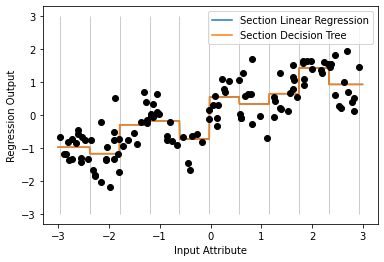

In [27]:
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='Section Linear Regression')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='Section Decision Tree')

plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=0.2)
plt.legend(loc='best')
plt.xlabel('Input Attribute')
plt.ylabel('Regression Output')

- 선형 회귀 모델과 결정 트리가 같은 예측을 만들어내서 두 선이 완전히 겹쳐졌습니다.

    - 구간별로 이 두 모델이 예측한 것은 상수값으로 각 구간 안에서는 특성의 값이 상수여서 어떤 모델이든 그 구간의 포인트에 대해 같은 값을 예측할 것입니다.

- 구간으로 나눈 특성을 사용하기 전과 비교해보면, 각 구간에서 다른 값을 가지고 있으므로 선형 모델이 훨씬 유연해진 것을 알 수 있습니다.

- 반면에 결정 트리는 덜 유연해졌는데 트리 모델은 데이터를 자유롭게 나눠 학습할 수 있으므로 특성의 값을 구간으로 나누는 것은 아무런 득이 되지 않습니다.

    - 다르게 생각하면 결정 트리는 데이터셋에서 예측을 위한 가장 좋은 구간을 학습한다고 볼 수 있습니다.

    - 거기다가 구간 나누기는 특성마다 따로 해야 하지만, 결정 트리는 한 번에 여러 특성을 살필 수 있습니다. 그래서 선형 모델이 이런 변환에서 큰 이득을 얻습니다.

- 일부 특성과 출력이 비선형 관계이지만, 용량이 매우 크고 고차원 데이터셋이라 선형 모델을 사용해야 한다면 구간 분할이 모델 성능을 높이는 데 아주 좋은 방법이 될 수 있습니다.

## 4.5 상호작용과 다항식

- 특별히 특성을 풍부하게 나타내는 또 하나의 방법은 원 본 데이터에 **상호작용**과 **다항식**을 추가하는 것입니다.

    - 이런 종류의 특성 공학은 통계적 모델링에서 자주 사용하지만 일반적인 머신러닝 애플리케이션에도 많이 적용합니다.

- 첫 번째 예제로 이전에 학습한 wave 데이터셋을 보겠습니다.

    - 선형 모델은 wave 데이터셋의 각 구간에 대해 상수값을 학습했습니다.

    - 그런데 선형 모델은 이런 절편 외에도 기울기도 학습할 수 있습니다.

- 선형 모델에 기울기를 추가하는 방법은 구간으로 분할된 데이터에 원래 특성을 다시 추가하는 것입니다. 이렇게 하면 11차원 데이터셋이 만들어지게 됩니다.

In [29]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(120, 11)


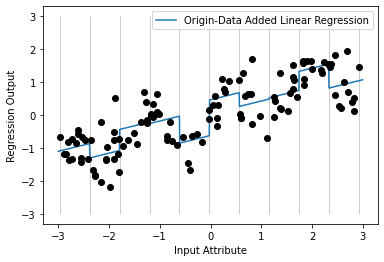

In [30]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='Origin-Data Added Linear Regression')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=0.2)
plt.legend(loc='best')
plt.xlabel('Input Attribute')
plt.ylabel('Regression Output')
plt.plot(X[:, 0], y, 'o', c='k')

- 이 예에서 이 모델은 각 구간의 절편과 기울기를 학습했습니다.

    - 학습된 기울기는 양수이고 모든 구간에 걸쳐 동일합니다. 즉, x축 특성이 하나이므로 기울기도 하나입니다.

- 기울기가 모든 구간에서 같으니 유익해보이지 않으며 오히려 각 구간에서 다른 기울기를 가지는 게 좋을 것 같습니다.

    - 이런 효과를 위해 데이터 포인트가 있는 구간과 x축 사이의 상호작용 특성을 추가할 수 있습니다.

    - 이 특성이 구간 특성과 원본 특성의 곱이며 이 데이터셋을 만들어보겠습니다.

In [31]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(120, 20)


- 데이터셋은 이제 데이터 포인트가 속한 구간과 이 구간에 원본 특성을 곱한 값을 더해 20개의 특성을 가집니다.

    - 이 곱셈 특성을 각 구간에 대한 x축 특성의 복사본이라고 생각할 수 있습니다.

    - 즉 이 값은 구간 안에서는 원본 특성이고 다른 곳에서는 0입니다.

- 이제 이를 사용한 결과는 다음과 같습니다.

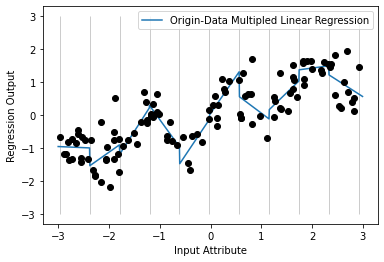

In [32]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='Origin-Data Multipled Linear Regression')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=0.2)
plt.legend(loc='best')
plt.xlabel('Input Attribute')
plt.ylabel('Regression Output')
plt.plot(X[:, 0], y, 'o', c='k')

- 이 그림에서 볼 수 있듯이 이 모델에서는 각 구간에서 절편과 기울기가 모두 다릅니다.

- 구간 나누기는 연속형 특성을 확장하는 방법 중 하나입니다. 이와 비슷하게 원본 특성ㅇ의 다항식을 추가하는 방법도 있습니다.

    - 어떤 특성 x가 주어지면 제곱, 세제곱 등을 시도해볼 수 있는데 이 방식은 preprocessing 모듈의 PolynomialFeatures에 구현되어 있습니다.

In [33]:
from sklearn.preprocessing import PolynomialFeatures

# x ** 10까지 고차항을 추가하고 include_bias=True가 절편에 해당하는 1인 특성을 추가하는 것을 바꿔줍니다.
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

- 10차원을 사용했으므로 10개의 특성이 만들어집니다.

In [34]:
print('X_poly.shape:', X_poly.shape)

X_poly.shape: (120, 10)


- X와 X_poly의 값을 비교해보겠습니다.

In [36]:
print('X:\n', X[:5])
print('X_poly:\n', X_poly[:5])

X:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
X_poly:
 [[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


- 각 특성의 차수를 알려주는 get_feature_names 메서드를 사용해 특성의 의미를 할 수 있습니다.

In [37]:
print('Feature Names:\n', poly.get_feature_names())

Feature Names:
 ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


- X_poly의 첫 번째 열은 X와 같고 다른 열은 첫 번째 열의 거듭제곱입니다. 그래서 어떤 값은 매우 크게 나오는 것을 볼 수 있습니다.

- 다항식 특성을 선형 모델과 함께 사용하면 전형적인 **다항 회귀** 모델이 됩니다.

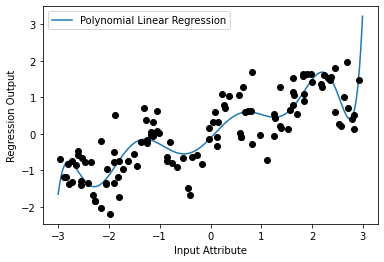

In [38]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='Polynomial Linear Regression')

plt.legend(loc='best')
plt.xlabel('Input Attribute')
plt.ylabel('Regression Output')
plt.plot(X[:, 0], y, 'o', c='k')

- 다항식 특성은 1차원 데이터셋에서도 매우 부드러운 곡선을 만들지만 고차원 다항식은 데이터가 부족한 영역에서 매우 민감하게 동작합니다.

- 비교를 위해 아무런 변환도 거치지 않은 원본 데이터에 커널 SVM 모델을 학습시켜보았습니다.

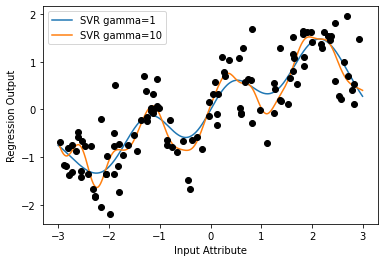

In [39]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label=f'SVR gamma={gamma}')

plt.legend(loc='best')
plt.xlabel('Input Attribute')
plt.ylabel('Regression Output')
plt.plot(X[:, 0], y, 'o', c='k')

- 더 복잡한 모델인 커널 SVM을 사용해 특성 데이터를 변환하지 않고 다항 회귀와 비슷한 복잡도를 가진 예측을 만들었습니다.

- 상호작용과 다항식을 위한 더 현실적인 애플리케이션으로 보스턴 주택 가격 데이터셋을 이용해보겠습니다.

    - 이미 2장에서 이 데이터셋에 다항식 특성을 적용했었습니다.

    - 이제 이 특성들이 어떻게 구성되었는지 살펴보고 다항식 특성이 얼마나 도움이 되는지 보겠습니다.

- 먼저 데이터를 읽어 들이고 MinMaxScaler를 사용해 스케일을 0에서 1사이로 조정합니다.

In [41]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

# 데이터 스케일을 조정합니다.
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

- 이제 차수를 2로 하여 다항식 특성을 뽑습니다.

In [43]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)

X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print('X_train.shape:', X_train.shape)
print('X_train_poly.shape:', X_train_poly.shape)

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


- 이 데이터는 원래 특성이 13개지만 105개의 교차 특성으로 확장되었습니다.

    - 새로운 특성은 원래 특성의 제곱은 물론 가능한 두 특성의 조합을 모두 포함합니다.

    - 즉, degree=2로 원본 특성에서 두 개를 뽑아 만들 수 있는 모든 곱을 얻을 수 있습니다.

- 어떤 원본 특성이 곱해져 새 특성이 만들어졌는지 정확한 관계를 보려면 get_feature_names 메서드를 사용합니다.

In [44]:
print('Polynomial Feature Names:\n', poly.get_feature_names())

Polynomial Feature Names:
 ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


- 첫 번째 특성은 상수항, 즉 1이며 다음 13개 특성은 원본 특성입니다. 그 외 나머지는 첫 번째 특성의 제곱항을 포함해 다른 특성들 간의 조합입니다.

- 상호작용 특성이 있는 데이터와 없는 데이터에 대해 Ridge를 사용해 성능을 비교해보겠습니다.

In [45]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)
print(f'상호작용이 없을 때 점수: {ridge.score(X_test_scaled, y_test):.3f}')

ridge = Ridge().fit(X_train_poly, y_train)
print(f'상호작용이 있을 때 점수: {ridge.score(X_test_poly, y_test):.3f}')

상호작용이 없을 때 점수: 0.621
상호작용이 있을 때 점수: 0.753


- 확실히 상호작용과 다항식 특성이 Ridge의 성능을 크게 높였습니다.

- 그러나 랜덤 포레스트 같이 더 복잡한 모델을 사용하면 이야기가 달라집니다.

In [46]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)
print(f'상호작용이 없을 때 점수: {rf.score(X_test_scaled, y_test):.3f}')

rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_poly, y_train)
print(f'상호작용이 있을 때 점수: {rf.score(X_test_poly, y_test):.3f}')

상호작용이 없을 때 점수: 0.795
상호작용이 있을 때 점수: 0.774


- 특성을 추가하지 않아도 랜덤 포레스트는 Ridge의 성능과 맞먹습니다. 오히려 상호작용과 다항식을 추가하면 성능이 조금 줄어듭니다.

## 4.6 일변량 비선형 변환

- 앞에서 제곱항을 추가하면 선형 회귀 모델에 도움이 됨을 보았는데 이처럼 log, exp, sin 같은 수학 함수를 적용하는 방법도 특성 변환에 유용합니다.

- 트리 기반 모델은 특성의 순서에만 영향을 받지만 선형 모델과 신경망은 각 특성의 스케일과 분포에 밀접하게 연관되어 있고 특성과 타깃값 사이에 비선형성이 있다면 특히 선형 회귀에서는 모델을 만들기 어렵습니다.

    - 이 때 log와 exp 함수는 데이터의 스케일을 변경해 선형 모델과 신경망의 성능을 올리는 데 도움을 줍니다.

        - 2장에서 컴퓨터 메모리 가격 데이터를 사용한 애플리케이션에서 이를 사용했습니다.
    
    - sin과 cos 함수는 주기적인 패턴이 들어 있는 데이터를 다룰 때 편리합니다.

- 대부분의 모델은 각 특성이 (회귀에서는 타깃도) 정규분포와 비슷할 때 최고의 성능을 냅니다. 즉, 특성의 히스토그램이 종 모양과 비슷할 때입니다.

    - log나 exp 같은 함수를 사용하는 것은 편법이지만 이런 모양을 만드는 쉽고 효과적인 방법입니다.

- 이런 변환이 도움되는 전형적인 경우는 정수 카운트 데이터를 다룰 때입니다. 이 데이터는 '사용자가 얼마나 자주 로그인 하는가?' 같은 특성을 말합니다.

    - 카운트에는 음수가 없으며 특별한 통계 패턴을 따르는 경우가 많습니다.

- 여기서 실제 데이터의 속성과 비슷한 카운트 데이터를 만들어 사용하겠습니다. 특성은 모두 정수이고 응답은 실수입니다.

In [48]:
rnd = np.random.RandomState(0)

X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)
print(X[:10, 0])

[ 56  81  25  20  27  18  12  21 109   7]


- 첫 번째 특성 맨 앞 10개를 살펴보면 모두 양의 정수이지만 특정한 패턴이 보이지 않습니다. 하지만 각 값이 나타난 횟수를 세면 그 분포가 잘 드러납니다.

In [49]:
print('특성 출연 횟수:\n', np.bincount(X[:, 0]))

특성 출연 횟수:
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


- 2가 68번으로 가장 많이 나타나고 큰 값의 수는 빠르게 줄어들지만 85나 86처럼 몇몇 값은 존재합니다. 이를 시각화 하겠습니다.

Text(0, 0.5, 'Count')

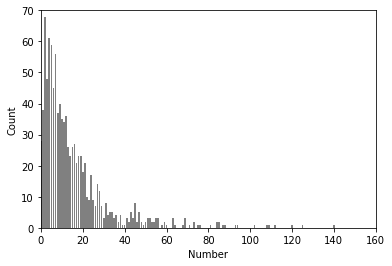

In [50]:
plt.xlim(0, 160)
plt.ylim(0, 70)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.xlabel('Number')
plt.ylabel('Count')

- X[:, 1]과 X[:, 2] 특성도 비슷하며 이런 종류의 분포는 실제로 자주 나타납니다.

- 그러나 선형 모델은 이런 데이터를 잘 처리하지 못합니다. 이 데이터에 리지 회귀를 적용해보겠습니다.

In [51]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(f'테스트 점수: {Ridge().fit(X_train, y_train).score(X_test, y_test):.3f}')

테스트 점수: 0.622


- 비교적 낮은 R 제곱 점수가 나온 것으로 보아 Ridge는 X와 y의 관계를 제대로 모델링하지 못했습니다.

- 하지만 로그 스케일로 변환하면 도움이 됩니다.

    - 다만 데이터에 0이 있으면 log 함수를 적용할 수 없으므로 log(X + 1)을 사용합니다.

In [52]:
X_train_log, X_test_log = np.log(X_train + 1), np.log(X_test + 1)

- 변환 후 데이터의 분포가 덜 치우쳐 있고 매우 큰 값을 가진 이상치가 없음을 확인할 수 있습니다.

Text(0, 0.5, 'Count')

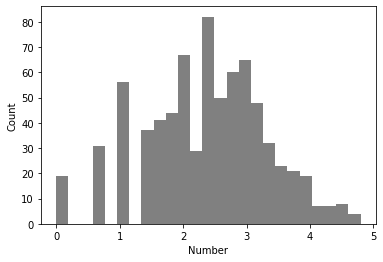

In [53]:
plt.hist(X_train_log[:, 0], bins=25, color='grey')
plt.xlabel('Number')
plt.ylabel('Count')

- 이 데이터에 리지 모델을 만들면 훨씬 좋은 결과가 나옵니다.

In [54]:
print(f'테스트 점수: {Ridge().fit(X_train_log, y_train).score(X_test_log, y_test):.3f}')

테스트 점수: 0.875


- 데이터셋과 모델의 조합에 최적인 변환 방법을 찾기란 예술에 가까운 일입니다.

    - 이 예에서는 모든 특성이 같은 속성을 가지고 있지만 실제로 이런 경우는 드물며 일부 특성만 변환하거나 특성마다 모두 다르게 변환하기도 합니다.

- 앞서 언급한 대로 이런 변환은 트리 기반 모델에서는 불필요하지만 선형 모델에서는 필수입니다.

    - 가끔 회기에서는 타깃 변수 y를 변환하는 것이 좋을 때도 있습니다.

    - 예를 들어 카운트를 예측하는 경우가 전형적인 예로 log(y + 1)을 사용해 변환하면 도움이 됩니다.

- 이전 예에서 보았듯이 구간 분할, 다항식, 상호작용은 데이터가 주어진 상황에서 모델의 성능에 큰 영향을 줄 수 있습니다.

    - 특별히 선형 모델이나 나이브 베이즈 모델 같은 덜 복잡한 모델일 경우입니다.

    - 반면에 트리 기반 모델은 스스로 중요한 상호작용을 찾아낼 수 있고 대부부분의 경우 데이터를 명시적으로 변환하지 않아도 됩니다.

    - SVM, 최근접 이웃, 신경망 같은 모델은 이따금 구간 분할, 상호작용, 다항식으로 이득을 볼 수 있지만 선형 모델보다는 영향이 그렇게 뚜렷하지 않습니다.